In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image
from os import listdir
from os.path import isfile, join
from matplotlib import cm

Image array shape (colored): (240, 320, 3)
Label array shape: (240, 320)
Label viz sarray shape: (240, 320, 3)


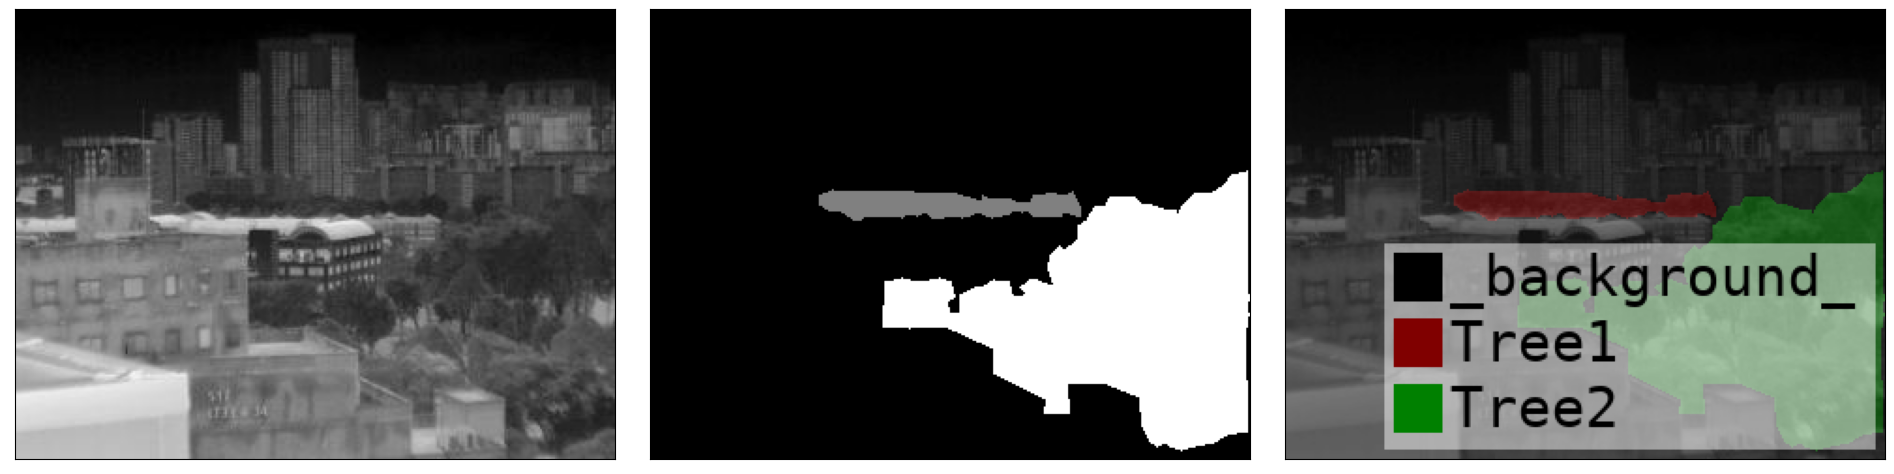

In [2]:
# Visual the example label output
example_path = '../data/convert/snap-2022-08-03T13-48-18.19'

img = np.asarray(PIL.Image.open(os.path.join(example_path, 'img.png')))
label = np.asarray(PIL.Image.open(os.path.join(example_path, 'label.png')))
label_viz = np.asarray(PIL.Image.open(os.path.join(example_path, 'label_viz.png')))

print(f'Image array shape (colored): {img.shape}')
print(f'Label array shape: {label.shape}')
print(f'Label viz sarray shape: {label_viz.shape}')

fig, axs = plt.subplots(1, 3, figsize = (3 * 6.4, 4.8))
axs[0].imshow(img)
axs[1].imshow(label, cmap=cm.binary_r)
axs[2].imshow(label_viz)

for i in range(3):
    axs[i].get_xaxis().set_visible(False)
    axs[i].get_yaxis().set_visible(False)

plt.tight_layout()

In [3]:
def countour(lbl, data, label):
    ''' Get the average value in a countour
    Args:
        - lbl <np.array>: loaded lable.png
        - data <str>: any image csv datafile
        - label <int>: the index of item 
    Returns:
        - the average of the value of data in 
          the label type range
    '''
    k = 0
    value = 0
    sum = 0
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if lbl[i,j] == label:
                value = data.iloc[i,j]
                sum += value
                k = k+1
                avg = sum/k
    return avg

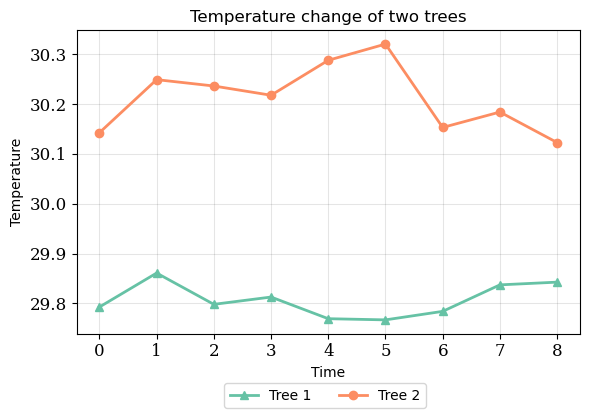

In [5]:
# Example of two trees average temperature change
load_path = '../data/processed/2022-08-03/view_1'
tree1_series = []
tree2_series = []
files = [f for f in listdir(load_path) if isfile(join(load_path, f))]
for i in files:
    data = pd.read_csv(os.path.join(load_path, i), header=None)
    avg = countour(label, data, 1)
    tree1_series.append(avg)
    avg = countour(label, data, 2)
    tree2_series.append(avg)

# Visualize the result
fig, axs = plt.subplots(1, figsize=(6, 4))
    
axs.plot(tree1_series, label='Tree 1', color=cm.Set2(0), marker='^', lw=2)
axs.plot(tree2_series, label='Tree 2', color=cm.Set2(1), marker='o', lw=2)

axs.set_xlabel('Time')
axs.set_ylabel('Temperature')
axs.set_title('Temperature change of two trees')

axs.grid(axis='both', color='black', alpha=0.1)
axs.tick_params(axis='both', which='major', labelsize=12)

labels = axs.get_xticklabels() + axs.get_yticklabels()
[label.set_fontname('serif') for label in labels]

handles, labels = axs.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=int(len(labels)/1), bbox_to_anchor=(0.55, -0.05))

plt.tight_layout()